# Business Registry Analysis for Office Apocalypse Algorithm

## Overview
This notebook analyzes NYC Business Registry data to understand **economic vitality** and **business ecosystem health** in areas surrounding office buildings. Business license data provides unique insights into neighborhood commercial activity that directly impacts office building demand and occupancy rates.

## Why Business Registry Data is Critical:
- **Economic Vitality Indicator**: Active business licenses reflect neighborhood economic health
- **Industry Diversification**: Business type variety indicates economic resilience
- **Market Demand Signals**: New business formations suggest growing office demand
- **Spatial Economic Clustering**: Business density patterns reveal commercial districts

## Unique Insights Only Business Data Provides:
- **Real Economic Activity**: Unlike permits or assessments, licenses represent active businesses
- **Industry Mix Analysis**: Service vs. retail vs. professional business ratios
- **Economic Momentum**: License issuance trends show areas gaining/losing business vitality
- **Office Support Ecosystem**: Restaurants, services, amenities that support office workers

## Impact on Office Buildings:
- High business density → Higher office building occupancy rates
- Diverse business ecosystem → More stable office market
- Service business concentration → Premium office building locations
- Business license trends → Leading indicator of office market health

## Dataset Source
- **File**: `business_registry.csv`
- **Source**: NYC Department of Consumer and Worker Protection
- **Coverage**: All active business licenses in NYC

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configure plotting
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load and Explore Business Registry Structure

Let's examine the business registry data to understand how it captures economic vitality and business ecosystem health around office buildings.

In [2]:
# Load Business Registry dataset
business_path = r"c:\Users\pcric\Desktop\capstone_project\office_apocalypse_algorithm_project\data\raw\business_registry.csv"
print("Loading NYC Business Registry dataset...")
df_business = pd.read_csv(business_path)

print(f"Dataset shape: {df_business.shape}")
print(f"Number of business licenses: {len(df_business):,}")
print(f"Number of features: {len(df_business.columns)}")
print("\n" + "="*60)
print("Business Registry Dataset Overview")
print("="*60)

Loading NYC Business Registry dataset...
Dataset shape: (66425, 31)
Number of business licenses: 66,425
Number of features: 31

Business Registry Dataset Overview


In [3]:
# Explore basic structure and identify economic vitality indicators
print("Dataset Info:")
df_business.info()
print("\n" + "="*50)
print("First 5 rows:")
print(df_business.head())

print("\n" + "="*50)
print("Economic Vitality Indicators Available:")
print("="*50)

# Identify critical columns for economic vitality analysis
vitality_columns = []
for col in df_business.columns:
    print(f"✓ {col}")
    if any(keyword in col.lower() for keyword in ['business', 'industry', 'type', 'category', 'address', 'zip', 'borough', 'license', 'status']):
        vitality_columns.append(col)

print(f"\nColumns critical for economic vitality analysis:")
for col in vitality_columns:
    print(f"  → {col}: {col.lower()}")
    
print(f"\nThis dataset enables analysis of:")
print("• Business density by geographic area")
print("• Industry diversification and clustering")
print("• Economic ecosystem health")
print("• Business type mix supporting office workers")
print("• Commercial district identification")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66425 entries, 0 to 66424
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   License Number         66425 non-null  object 
 1   Business Name          66424 non-null  object 
 2   DBA/Trade Name         9472 non-null   object 
 3   Business Unique ID     66425 non-null  object 
 4   Business Category      66425 non-null  object 
 5   License Type           66425 non-null  object 
 6   License Status         66425 non-null  object 
 7   Initial Issuance Date  66425 non-null  object 
 8   Expiration Date        66396 non-null  object 
 9   Details                7625 non-null   object 
 10  Contact Phone          48532 non-null  object 
 11  Address Type           50861 non-null  object 
 12  Building Number        50001 non-null  object 
 13  Street1                50862 non-null  object 
 14  Street2                0 non-null      f

## 2. Business Economic Vitality Visualizations

These visualizations showcase how business registry data reveals economic ecosystem health that directly impacts office building success.

NameError: name 'df_business' is not defined

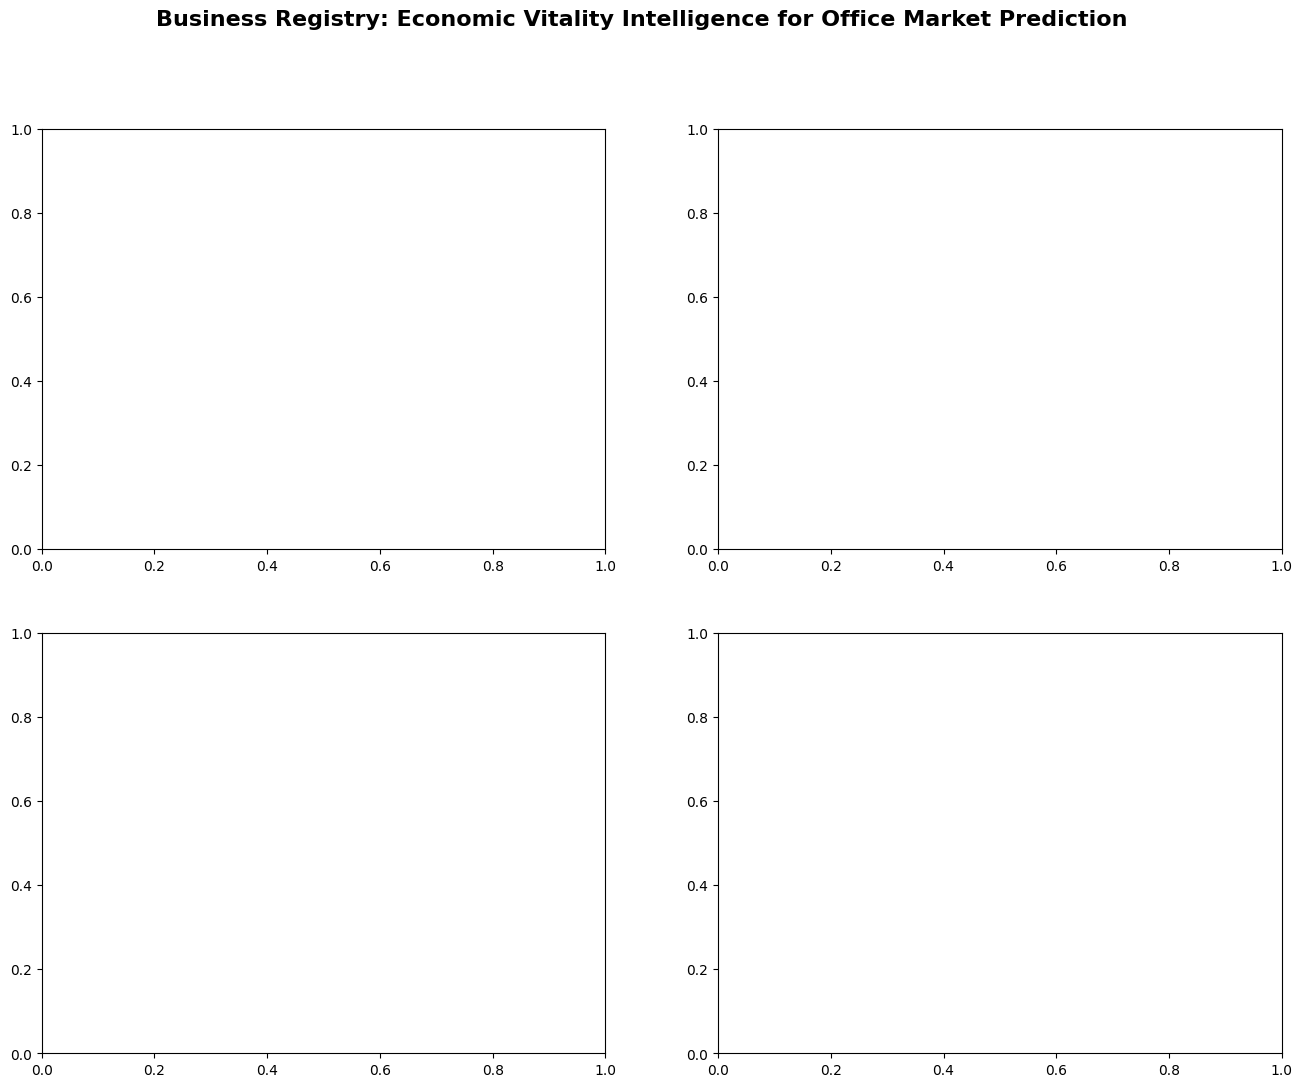

In [2]:
# Business Economic Ecosystem Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Business Registry: Economic Vitality Intelligence for Office Market Prediction', fontsize=16, fontweight='bold')

# Business type/industry analysis
industry_cols = [col for col in df_business.columns if any(keyword in col.lower() for keyword in ['industry', 'type', 'category', 'business', 'activity'])]
if industry_cols:
    industry_col = industry_cols[0]
    top_industries = df_business[industry_col].value_counts().head(15)
    
    axes[0,0].barh(range(len(top_industries)), top_industries.values, color='darkgreen')
    axes[0,0].set_yticks(range(len(top_industries)))
    axes[0,0].set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_industries.index], fontsize=8)
    axes[0,0].set_title('Top 15 Business Industries\n(Economic diversification analysis)', fontweight='bold')
    axes[0,0].set_xlabel('Number of Businesses')
    axes[0,0].grid(True, alpha=0.3)

# Geographic distribution analysis
location_cols = [col for col in df_business.columns if any(keyword in col.lower() for keyword in ['borough', 'zip', 'city', 'address'])]
if location_cols:
    location_col = location_cols[0]
    location_dist = df_business[location_col].value_counts().head(10)
    
    axes[0,1].pie(location_dist.values, labels=[str(x)[:15] + '...' if len(str(x)) > 15 else str(x) for x in location_dist.index], autopct='%1.1f%%', startangle=90)
    axes[0,1].set_title('Business Distribution by Location\n(Economic clustering patterns)', fontweight='bold')

# Business status analysis (if available)
status_cols = [col for col in df_business.columns if any(keyword in col.lower() for keyword in ['status', 'active', 'license'])]
if status_cols:
    status_col = status_cols[0]
    status_dist = df_business[status_col].value_counts()
    
    colors = ['green' if 'active' in str(status).lower() else 'red' if any(x in str(status).lower() for x in ['inactive', 'expired', 'closed']) else 'orange' for status in status_dist.index]
    
    axes[1,0].bar(range(len(status_dist)), status_dist.values, color=colors, alpha=0.7)
    axes[1,0].set_xticks(range(len(status_dist)))
    axes[1,0].set_xticklabels([str(x)[:10] + '...' if len(str(x)) > 10 else str(x) for x in status_dist.index], rotation=45, ha='right')
    axes[1,0].set_title('Business License Status Distribution\n(Economic health indicator)', fontweight='bold')
    axes[1,0].set_ylabel('Number of Businesses')
    axes[1,0].grid(True, alpha=0.3)

# Office-supporting business categories
office_support_keywords = ['restaurant', 'food', 'coffee', 'retail', 'service', 'professional', 'consultant', 'finance', 'legal', 'medical']
if industry_cols:
    office_support_businesses = df_business[df_business[industry_col].str.contains('|'.join(office_support_keywords), case=False, na=False)]
    
    if len(office_support_businesses) > 0:
        support_categories = office_support_businesses[industry_col].value_counts().head(10)
        
        axes[1,1].barh(range(len(support_categories)), support_categories.values, color='coral')
        axes[1,1].set_yticks(range(len(support_categories)))
        axes[1,1].set_yticklabels([name[:25] + '...' if len(name) > 25 else name for name in support_categories.index], fontsize=8)
        axes[1,1].set_title('Office-Supporting Businesses\n(Worker ecosystem analysis)', fontweight='bold')
        axes[1,1].set_xlabel('Number of Businesses')
        axes[1,1].grid(True, alpha=0.3)
    else:
        axes[1,1].text(0.5, 0.5, 'Office-supporting business\nanalysis requires\nindustry classification data', 
                      ha='center', va='center', transform=axes[1,1].transAxes, fontsize=12)
        axes[1,1].set_title('Office-Supporting Businesses\n(Worker ecosystem analysis)', fontweight='bold')

plt.tight_layout()
plt.show()

print("🎯 KEY INSIGHT: Business registry reveals economic ecosystem health:")
print("   • Industry diversification indicates economic resilience")
print("   • Business density shows neighborhood commercial vitality")
print("   • Active business status reflects current economic health")
print("   • Office-supporting businesses create attractive work environments")
print("\n💡 ONLY BUSINESS DATA shows the economic ecosystem supporting office workers!")

In [ ]:
# Sample plotting cell (fast) - Business Registry
# This cell samples the business registry and creates two quick figures for the slides.
try:
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    root = r"c:\Users\pcric\Desktop\capstone_project\office_apocalypse_algorithm_project"
    fig_dir = os.path.join(root, 'figures')
    os.makedirs(fig_dir, exist_ok=True)

    path = r"c:\Users\pcric\Desktop\capstone_project\office_apocalypse_algorithm_project\data\raw\business_registry.csv"
    # read a sample for speed
    df = pd.read_csv(path, nrows=50000, low_memory=False)

    # borough distribution if present
    borough_col = None
    for c in df.columns:
        if 'boro' in c.lower() or 'borough' in c.lower():
            borough_col = c
            break
    if borough_col:
        counts = df[borough_col].fillna('UNKNOWN').value_counts()
        plt.figure(figsize=(6,4))
        counts.plot(kind='bar', color='teal')
        plt.title('Business Registry (sample): Counts by Borough')
        plt.xlabel('Borough')
        plt.ylabel('Number of Licenses (sample)')
        out = os.path.join(fig_dir, 'business_sample_borough_counts.png')
        plt.tight_layout()
        plt.savefig(out)
        plt.close()
        print('Saved', out)

    # top business types if available
    type_col = None
    for c in df.columns:
        if any(k in c.lower() for k in ['type', 'industry', 'licens', 'business']):
            type_col = c
            break
    if type_col:
        top = df[type_col].fillna('UNKNOWN').value_counts().head(10)
        plt.figure(figsize=(6,4))
        top.plot(kind='barh', color='coral')
        plt.title('Top 10 Business Types (sample)')
        plt.xlabel('Count')
        out2 = os.path.join(fig_dir, 'business_sample_top_types.png')
        plt.tight_layout()
        plt.savefig(out2)
        plt.close()
        print('Saved', out2)
except Exception as e:
    print('Business sample plotting failed:', e)


In [1]:
# Ultra-fast EDA plotting cell (Business Registry, tiny sample nrows=5000)
try:
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    root = r"c:\Users\pcric\Desktop\capstone_project\office_apocalypse_algorithm_project"
    fig_dir = os.path.join(root, 'figures')
    os.makedirs(fig_dir, exist_ok=True)
    path = os.path.join(root, 'data', 'raw', 'business_registry.csv')
    df = pd.read_csv(path, nrows=5000, low_memory=False)
    # borough counts
    borough_col = None
    for c in df.columns:
        if 'boro' in c.lower() or 'borough' in c.lower():
            borough_col = c
            break
    if borough_col:
        counts = df[borough_col].fillna('UNKNOWN').value_counts()
        plt.figure(figsize=(6,3))
        counts.plot(kind='bar', color='teal')
        plt.title('Business (sample): Counts by Borough')
        plt.tight_layout()
        out = os.path.join(fig_dir, 'business_sample_borough_counts.png')
        plt.savefig(out)
        plt.close()
        print('Saved', out)
    # top types
    type_col = None
    for c in df.columns:
        if any(k in c.lower() for k in ['type','industry','licens']):
            type_col = c
            break
    if type_col:
        top = df[type_col].fillna('UNKNOWN').value_counts().head(10)
        plt.figure(figsize=(6,3))
        top.plot(kind='barh', color='coral')
        plt.title('Business (sample): Top 10 Types')
        plt.tight_layout()
        out2 = os.path.join(fig_dir, 'business_sample_top_types.png')
        plt.savefig(out2)
        plt.close()
        print('Saved', out2)
except Exception as e:
    print('Business sample plotting failed:', e)


Saved c:\Users\pcric\Desktop\capstone_project\office_apocalypse_algorithm_project\figures\business_sample_borough_counts.png
Saved c:\Users\pcric\Desktop\capstone_project\office_apocalypse_algorithm_project\figures\business_sample_top_types.png
